# Pipeline - Titanic

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("titanic-clean.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


## Trian/Test split

In [9]:
X=df.drop(columns=["Survived"])
y=df["Survived"]
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((704, 6), (177, 6))

## Pipeline

In [14]:
nn_par={"hidden_layer_sizes": (10,10, ),
       "max_iter": 1000,
       "verbose": True,
       "solver": "adam",
       "n_iter_no_change":100,
       "early_stopping": True}

columns_to_scale=["Pclass", "Sex", "Age", "SibSp", "Parch"]
columns_to_encode=["Embarked"]

transformer= ColumnTransformer(transformers=[("scaler",StandardScaler(),
                                             columns_to_scale),
                                             ("encoder",OneHotEncoder(),
                                             columns_to_encode)],
                              remainder="passthrough")

pipe=Pipeline(steps=[("transformer",transformer),
                    ("model",MLPClassifier(**nn_par))])
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Embarked'])])),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10),
                               max_iter=1000, n_iter_no_change=100,
                               verbose=True))])

In [15]:
pipe.fit(X_train,y_train)

Iteration 1, loss = 0.79949351
Validation score: 0.380282
Iteration 2, loss = 0.78801916
Validation score: 0.380282
Iteration 3, loss = 0.77654125
Validation score: 0.380282
Iteration 4, loss = 0.76599679
Validation score: 0.366197
Iteration 5, loss = 0.75541675
Validation score: 0.380282
Iteration 6, loss = 0.74499069
Validation score: 0.380282
Iteration 7, loss = 0.73554435
Validation score: 0.380282
Iteration 8, loss = 0.72606060
Validation score: 0.366197
Iteration 9, loss = 0.71692712
Validation score: 0.408451
Iteration 10, loss = 0.70845468
Validation score: 0.464789
Iteration 11, loss = 0.70016767
Validation score: 0.521127
Iteration 12, loss = 0.69174804
Validation score: 0.549296
Iteration 13, loss = 0.68431901
Validation score: 0.591549
Iteration 14, loss = 0.67685407
Validation score: 0.676056
Iteration 15, loss = 0.66957070
Validation score: 0.732394
Iteration 16, loss = 0.66246391
Validation score: 0.746479
Iteration 17, loss = 0.65546940
Validation score: 0.760563
Iterat

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Embarked'])])),
                ('model',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10),
                               max_iter=1000, n_iter_no_change=100,
                               verbose=True))])

## Evaluations

In [17]:
pipe.score(X_test,y_test)

0.7288135593220338

In [18]:
pipe.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1], dtype=int64)

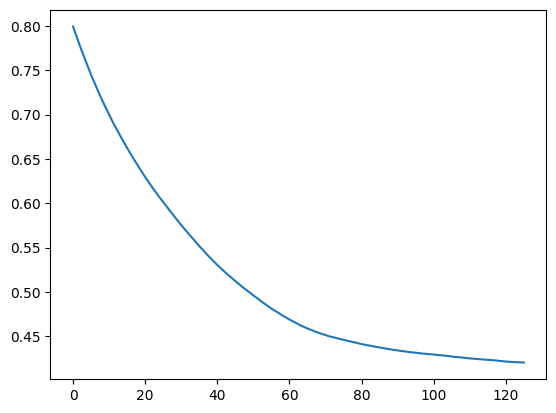

In [19]:
loss_curve=pipe["model"].loss_curve_
plt.plot(loss_curve)
plt.show()